# Credit Card Fraud Detection using Gaussian Naive Bayes Classifier

The dataset used was collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. It contains transactions made through credit cards in September 2013 by European cardholders. The data set has 492 frauds out of 284,807 transactions (0.172%) and thus is highly unbalanced. The features are numerical values generated using PCA transformation of the original features (for the sake of confidentiality). Features V1, V2, … V28 are the principal components obtained with PCA. Features 'Time' and 'Amount' are were not transformed, however. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Data set description taken from: https://www.kaggle.com/lovedeepsaini/fraud-detection-with-naive-bayes-classifier/data?<br>
Some ideas taken from: https://www.kaggle.com/lovedeepsaini/fraud-detection-with-naive-bayes-classifier/data

## Import Libraries

In [32]:
import time
import math
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pandas import DataFrame

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")


## Preprocessing Module

In [33]:
class Preprocessing:
    def __init__(self):
        self.numerical_features_name_list_including_labels = None
        self.categorical_features_namelist = None
        self.scaler_used_for_features = scaler_used_for_features
        self.labels = None
    
    
    
    
    #Custom train_test_split indices generator
    def train_test_split_indices(self, len_data, test_split_size):
        
        #Note that if a sample is to be dropped because of too many missing features, it should be done before this step.
        np.random.seed(42)
        shuffled_data_indices = np.random.permutation(len_data)
        total_test_data = int(test_split_size * len_data)
        testing_indices = shuffled_data_indices[:total_test_data]
        training_indices = shuffled_data_indices[total_test_data:]
        return training_indices, testing_indices
    
    
    def set_numerical_and_categorical_feature_names(self, dataframe):
        
        #get the names of the numeric feature columns only
        self.numerical_features_name_list_including_labels = dataframe.select_dtypes(include=np.number).columns.tolist()
        #get the names of the categorical feature columns only
        list_of_categorical_feature_names = []
        for feature in dataframe.columns:
            if dataframe.dtypes[feature] == "object":
                
                list_of_categorical_feature_names.append(feature)
        self.categorical_features_namelist = list_of_categorical_feature_names
        

## Gaussian Naive Bayes Implementation

In [ ]:
class Classifier:
    
    def __init__(self, features_train, targets_train, features_test, targets_test, scaler_used_for_features):
        self.features_train = features_train
        self.targets_train = targets_train
        self.features_test = features_test
        self.targets_test = targets_test
        
        
        
    
    
class Gaussian_Naive_Bayes(Classifier):
    
    def 

## Execution Begins

In [34]:
path = r"C:\Users\Being_Aerys\PycharmProjects\Machine_Learning_Algorithms_Collection\Supervised_Methods\Naive_Bayes_Classifier\data\gaussian_data\creditcard.csv"
raw_data = pd.read_csv(path, sep = ",")

#maintain a separate copy of the data for future purpose
COPY_OF_RAW_DATA = copy.deepcopy(raw_data)


preprocessing = Preprocessing()

training_indices, testing_indices = preprocessing.train_test_split_indices(len(raw_data), 0.2)
train_set, test_set = raw_data.iloc[training_indices], raw_data.iloc[testing_indices]

preprocessing.set_numerical_and_categorical_feature_names(train_set)


### Summary of the data set

In [35]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227846 entries, 59490 to 121958
Data columns (total 31 columns):
Time      227846 non-null float64
V1        227846 non-null float64
V2        227846 non-null float64
V3        227846 non-null float64
V4        227846 non-null float64
V5        227846 non-null float64
V6        227846 non-null float64
V7        227846 non-null float64
V8        227846 non-null float64
V9        227846 non-null float64
V10       227846 non-null float64
V11       227846 non-null float64
V12       227846 non-null float64
V13       227846 non-null float64
V14       227846 non-null float64
V15       227846 non-null float64
V16       227846 non-null float64
V17       227846 non-null float64
V18       227846 non-null float64
V19       227846 non-null float64
V20       227846 non-null float64
V21       227846 non-null float64
V22       227846 non-null float64
V23       227846 non-null float64
V24       227846 non-null float64
V25       227846 non-null float64
V

There is no null value in the data set. Hence, no null value removal or imputation required. All features are numerical, so no encoding required.

In [36]:
train_set.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,...,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000
mean,94792.350096,0.000909,-0.000380,-0.000922,-0.001453,0.000988,-0.000599,0.001099,-0.000400,0.000962,...,0.000207,-0.001215,0.000160,-0.000222,-0.000983,-0.000193,-0.000031,0.000255,88.483582,0.001729
std,47488.464929,1.958336,1.656600,1.514542,1.415852,1.387670,1.336817,1.243498,1.188667,1.097551,...,0.732625,0.725310,0.627142,0.605449,0.521766,0.482443,0.401820,0.329778,254.935475,0.041548
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.320155,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,54160.250000,-0.919922,-0.597966,-0.890770,-0.849265,-0.688808,-0.768571,-0.552153,-0.208432,-0.642383,...,-0.228737,-0.542809,-0.161305,-0.354891,-0.317835,-0.327474,-0.070959,-0.052987,5.600000,0.000000
50%,84705.500000,0.017977,0.066059,0.179034,-0.020957,-0.054712,-0.274841,0.041273,0.022231,-0.050402,...,-0.029639,0.005500,-0.010595,0.040766,0.015092,-0.052012,0.001360,0.011366,22.000000,0.000000
75%,139305.000000,1.315547,0.803905,1.025399,0.741632,0.611165,0.396075,0.570640,0.327499,0.599036,...,0.186080,0.527406,0.148201,0.439790,0.350451,0.240803,0.091401,0.078464,77.100000,0.000000
max,172792.000000,2.454930,22.057729,4.187811,16.875344,34.801666,73.301626,120.589494,20.007208,10.392889,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


As seen above, except for two features, "time" and "amount", all other features do not have an interpretation in terms of the original features. "time" is the number of seconds that have elapsed between the first transaction and this each sample. To see whether there is a trend on which class a sample lies in based on the amount of time that has elasped between the first transaction and a particular transaction, we can plot the number of transactions for each step in time. However, since the time is in seconds and the maximum value is 25691.160 seconds, it is important that we scale the x-axis (the time feature) down to a range the suits our display and thus helps us to make better conclusions.

In [37]:
train_set["hours_passed"] = train_set["Time"]/3600 # convert to hours
print(train_set["hours_passed"].tail(5))

119879    21.005000
259178    44.166667
131932    22.165278
146867    24.425278
121958    21.216944
Name: hours_passed, dtype: float64


Lets drop the original feature "Time"

In [38]:
train_set = train_set.drop(['Time'],axis=1)

Text(0, 0.5, 'No. of  transactions')

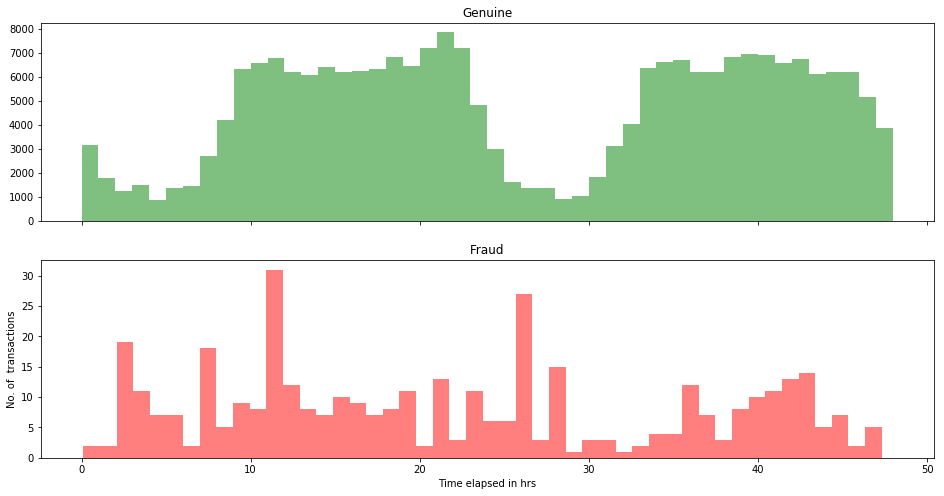

In [39]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(16,8))
ax1.hist(train_set.hours_passed[train_set.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(train_set.hours_passed[train_set.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time elapsed in hrs')
plt.ylabel('No. of  transactions')

From the histograms above, it is apparent that the maximum value that this new feature can take is within 0 and 50. The trends in both fraud and genuine classes are similar as the time progresses and are not discernible from each other in any way based on the number of hours passed since the first transaction. Hence, not much can be said about the classification just from the time feature.

Another such feature that we can look into to see of there is any trend is "Amount". One scenario in which plotting such information would be helpful is if all the transactions above a certain value were one class and all the other transactions were the other class. Before doint that, lets note that while all PCA features have a mean around zero and a standard deviation very close to one, feature "amount" is on a much larger scale. Hence, lets standardize it before plotting the trend.

Text(0, 0.5, 'No. of transactions')

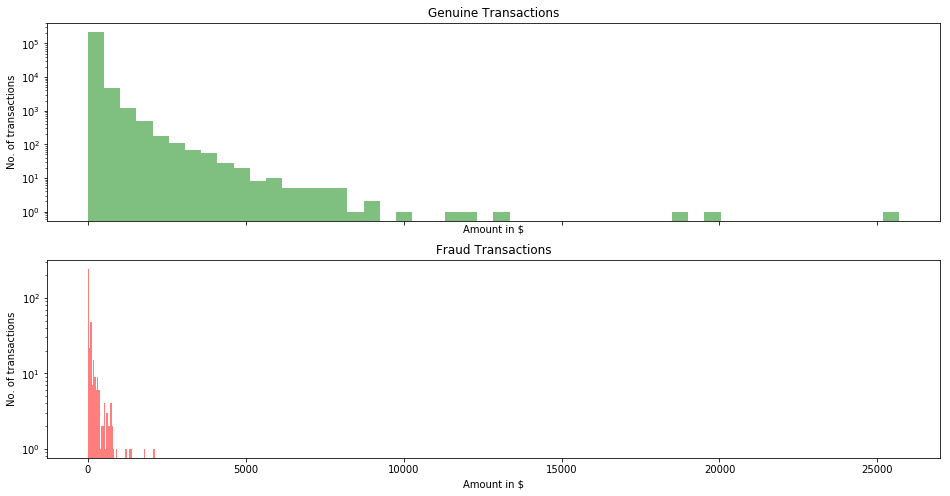

In [40]:
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (16,8), sharex = True)
ax3.hist(train_set.Amount[train_set.Class==0],bins=50,color='g',alpha=0.5)

#use log scale in y axis to see the tails in the x axis
ax3.set_yscale('log')
ax3.set_title('Genuine Transactions')
ax3.set_xlabel('Amount in $')
ax3.set_ylabel('No. of transactions')
ax4.hist(train_set.Amount[train_set.Class==1],bins=50,color='r',alpha=0.5)

#use log scale in y axis to see the tails in the x axis
ax4.set_yscale('log')
ax4.set_title('Fraud Transactions') # to see the tails
ax4.set_xlabel('Amount in $')
ax4.set_ylabel('No. of transactions')

There is no clear separation between the genuine and fraud transactions based in the amount of transaction as there is a significant overlap for transaction amount range (0$, ~2000$). However, one information that can be noted is that all the transactions with amount larger than 5000$ are in the genuine class.

Since this "Amount" feature, like the time feature, is on a scale much larger than the PCA features, lets standardize this feature.

In [41]:
train_set['scaled_amount'] = StandardScaler().fit_transform(train_set['Amount'].values.reshape(-1,1))
train_set = train_set.drop(['Amount'],axis=1)

In [42]:
train_set.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,hours_passed,scaled_amount
59490,-1.590486,0.992415,-0.512841,1.120752,-1.916756,3.142176,2.120463,-3.819649,0.209349,-0.028753,...,0.108047,-3.362671,-1.076905,-0.869555,-0.307649,0.125750,-0.607226,0,13.573333,3.207981
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,0,39.820000,-0.307897
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,0,32.548056,-0.167037
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,0,41.545833,-0.300051
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0,26.019444,0.113584


Since Naive Bayes classifier learns class prior from the data set, it is important that the training data is stratified so that the class priors represent a good approximation of the true distribution that generated the data set. Lets plot the class distribution using a pie-chart for this purpose.

Text(0, 0.5, '')

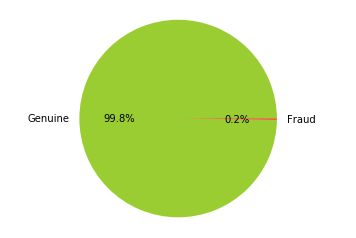

In [43]:
fig, ax = plt.subplots(1,1)
ax.pie(train_set.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

It appears that the training data has a higly imbalanced proportion of the two classes present. This can be remedied using different methods such as upsampling, downsampling, etc. But for now, we will proceed without giving this issue much attention.

## Use Class Conditional Densities to Check for the Gaussian Assumption

The Gaussian Naive Bayes classifier assumes that the class conditional for each feature follow a Gaussian distribution. This step is integrated to the feature selection step below since both the steps make use of the class conditional densities.

## Feature Selection using Class Conditional Densities

Not all features that we have are significantly helpful in our classification task. If the class conditional densities of a feature overlap significantly/ completely, this feature will not help in classification because there is not much distance between the two classes in the hyperspace on this axis. Lets see which features have (completely) overlapping class conditional densities so that we can remove them and thus reduce the model complexity without losing useful information.

Processing Column:  V1
Processing Column:  V2
Processing Column:  V3
Processing Column:  V4
Processing Column:  V5
Processing Column:  V6
Processing Column:  V7
Processing Column:  V8
Processing Column:  V9
Processing Column:  V10
Processing Column:  V11
Processing Column:  V12
Processing Column:  V13
Processing Column:  V14
Processing Column:  V15
Processing Column:  V16
Processing Column:  V17
Processing Column:  V18
Processing Column:  V19
Processing Column:  V20
Processing Column:  V21
Processing Column:  V22
Processing Column:  V23
Processing Column:  V24
Processing Column:  V25
Processing Column:  V26
Processing Column:  V27
Processing Column:  V28
Processing Column:  hours_passed
Processing Column:  scaled_amount


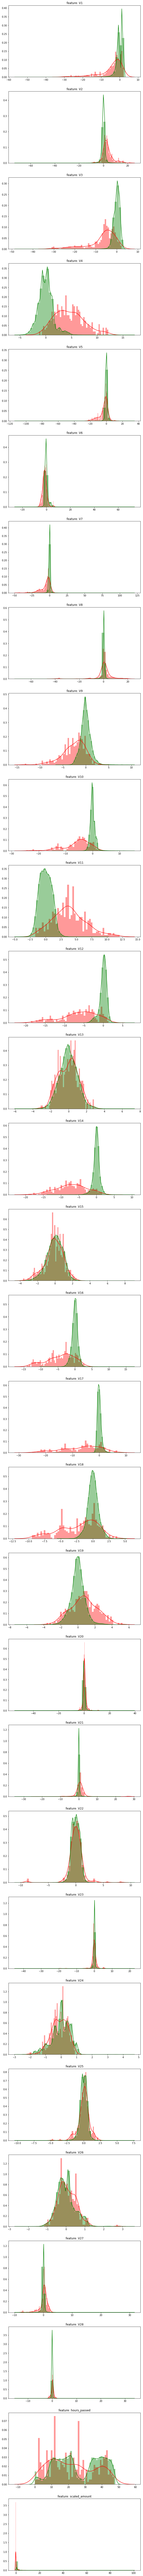

In [44]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(30, 1)

plt.figure(figsize=(10,50*4))

for i, col in enumerate(train_set[train_set.columns[~train_set.columns.isin(["Class"])]]):
    print("Processing Column: ", col)
    ax5 = plt.subplot(gs[i])
    sns.distplot(train_set[col][train_set.Class == 1], bins=50, color='r')
    sns.distplot(train_set[col][train_set.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))

plt.show()


It appears that all the class conditional densities have a somewhat gaussian distribution. In case the class conditional densities did not follow this assumption, we could discretize the features and then use multinomial naive bayes instead.

It can be observed that the class conditionals of the features v13, v15, v20, v22, v23, v24, v25, v26, v28, v29 overlap each other significantly. Hence we can remove these features without losing significant amount of information.

In [45]:
drop_list = ["V13", "V15", "V20", "V22", "V23", "V24", "V25", "V26", "V28"]
train_set = train_set.drop(drop_list, axis = 1)